In [8]:
import xml.etree.ElementTree as ET
import glob
import subprocess
import shutil
import pickle
import matplotlib.pyplot as plt
import sys
import os

In [30]:
app_perm_dictionary = {}

def apktool(apkName):
    subprocess.run(["apktool", "d", "-f",apkName, "-o" "temp_dir"], shell=True)

def deleteTempFolder():
    shutil.rmtree("temp_dir")
    
def read_app_permissions():

    files = glob.glob(os.path.dirname(os.getcwd()) + '\APKs\*')

    for file in files:
        app_name = file.split('/')[-1]
        app_perm_dictionary[app_name] = []
        apktool(file)
        tree = ET.parse("temp_dir/AndroidManifest.xml")
        uses_permissionE_elem = tree.findall('uses-permission')

        for elem in uses_permissionE_elem:
            app_perm_dictionary[app_name].append(elem.attrib[list(elem.attrib.keys())[0]])

        deleteTempFolder()

def top_ten_freq_permission():
    with open('filename.pickle', 'rb') as handle:
        app_perm_dictionary = pickle.load(handle)

    permission_count = {}

    for app in app_perm_dictionary:
        for perm in app_perm_dictionary[app]:
            if perm not in permission_count:
                permission_count[perm] = 1
            else:
                permission_count[perm] += 1
    
    permission_count_list = []

    for perm_name, perm_count in permission_count.items():
        permission_count_list.append([perm_count, perm_name])
    
    permission_count_list.sort(key=lambda x : x[0],reverse=True)

    print([x[1] for x in permission_count_list][:10])

    return permission_count_list

def top_ten_apps():

    with open('filename.pickle', 'rb') as handle:
        app_perm_dictionary = pickle.load(handle)

    app_permission_count = []

    for app, permissions in app_perm_dictionary.items():
        app_permission_count.append([len(permissions), app])
    
    app_permission_count.sort(key=lambda x : x[0], reverse=True)

    print([x[1] for x in app_permission_count][:10])

    return app_permission_count

def plot(app_permission_count):

    x = range(0,71)
    y = [0]*71
    for [count, app] in app_permission_count:
        y[count] += 1
    plt.bar(x, y)
    plt.xlabel("Number of Permissions")
    plt.ylabel("Number of Apps")
    for permission_count, app_count in enumerate(y):
        if app_count:
            plt.text(x=permission_count-0.5, y=app_count+0.5, s=f"{app_count}")
    plt.show()



In [31]:
read_app_permissions()

In [32]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(app_perm_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
permission_count_list = top_ten_freq_permission()

['android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.VIBRATE', 'android.permission.READ_PHONE_STATE', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.WAKE_LOCK', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.READ_CONTACTS', 'android.permission.CAMERA']


In [34]:
app_permission_count = top_ten_apps()

['C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\me.everything.launcher.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\9999999999999_com.android.phone.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\com.speaktoit.assistant.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\1311184772_es.codefactory.android.app.ma.vocalizerenudemo.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\1317675242_com.google.android.apps.plus.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\com.bluetornadosf.smartypants-190.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\com.avast.android.mobilesecurity-2129.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\1310178647_com.yahoo.mobile.client.android.im.apk', 'C:\\Users\\shara\\Documents\\ASU\\Projects\\CSE545-GROUP-47\\APKs\\com.booking.apk', 'C:\\Users\\shara\\Documen

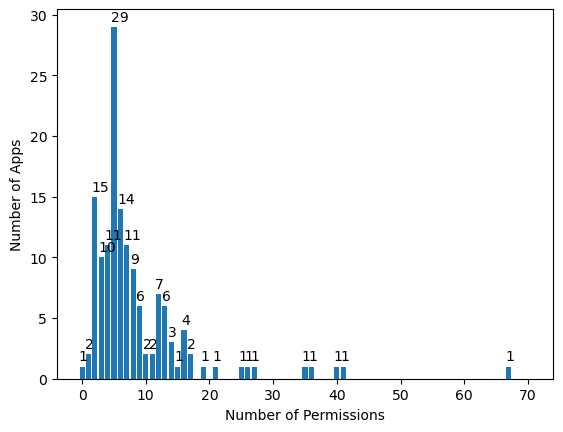

In [35]:
plot(app_permission_count)